In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
transactions = pd.read_excel('C:/Users/mandar/Downloads/QVI_transaction_data.xlsx')

In [4]:
purchase_behaviour = pd.read_csv('C:/Users/mandar/Downloads/QVI_purchase_behaviour.csv')

In [5]:
# Check the encoding of the csv file first

import chardet

with open('C:/Users/mandar/Downloads/QVI_purchase_behaviour.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# Check what the character encoding might be
result


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [6]:
# Transaction Dataset

In [7]:
transactions.shape

(264836, 8)

In [8]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
transactions.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [11]:
# Checking for missing data
transactions[transactions.isnull().any(axis=1)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [12]:
# Checking for duplicate transaction
transactions[transactions.duplicated(keep=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [13]:
# Removing duplicate transaction
transactions = transactions[~transactions.duplicated()]

In [14]:
# Variable Interpretation
type(transactions['STORE_NBR'][0])

numpy.int64

In [15]:
type(transactions['LYLTY_CARD_NBR'][0])

numpy.int64

In [16]:
type(transactions['DATE'][0])

numpy.int64

In [17]:
type(transactions['TXN_ID'][0])

numpy.int64

In [18]:
type(transactions['PROD_NAME'][0])

str

In [19]:
type(transactions['PROD_NBR'][0])

numpy.int64

In [20]:
type(transactions['PROD_QTY'][0])

numpy.int64

In [21]:
type(transactions['TOT_SALES'][0])

numpy.float64

In [22]:
print(len(transactions.DATE.unique()))

364


In [23]:
from datetime import datetime, timedelta
import xlrd

In [24]:
# Convert Dates to Date Format

def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

transactions.DATE = pd.to_datetime(transactions.DATE.apply(read_date), errors='coerce')

transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [25]:
transactions.DATE.value_counts()

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64

In [26]:
# Finding the missing date
dates = transactions.DATE.tolist()
print('Earliest Date: ', transactions.DATE.min())
print('Latest Date: ', transactions.DATE.max())

date_set = set(transactions.DATE.min() + timedelta(x) for x in range(365))
missing = sorted(date_set - set(transactions.DATE))
print('Missing Date: ', missing)

Earliest Date:  2018-07-01 00:00:00
Latest Date:  2019-06-30 00:00:00
Missing Date:  [Timestamp('2018-12-25 00:00:00')]


In [27]:
transactions.describe().round(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.00,264835.00,264835.00,264835.00,264835.00,264835.00
mean,135.08,135549.58,135158.41,56.58,1.91,7.30
std,76.78,80580.11,78133.16,32.83,0.64,3.08
min,1.00,1000.00,1.00,1.00,1.00,1.50
25%,70.00,70021.00,67601.00,28.00,2.00,5.40
50%,130.00,130358.00,135138.00,56.00,2.00,7.40
75%,203.00,203094.50,202701.50,85.00,2.00,9.20
max,272.00,2373711.00,2415841.00,114.00,200.00,650.00


In [28]:
print(transactions.PROD_QTY.value_counts())

2      236038
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64


In [29]:
print(transactions.PROD_NAME.value_counts())

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64


In [30]:
print(transactions[transactions.PROD_QTY == 200])

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [31]:
print(transactions[transactions.LYLTY_CARD_NBR == 226000])

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [32]:
print(purchase_behaviour[purchase_behaviour.LYLTY_CARD_NBR == 226000])

       LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER
59694          226000  OLDER FAMILIES          Premium


In [33]:
transactions['PROD_NAME'].sample(15)

250174        Kettle Sea Salt     And Vinegar 175g
39517          RRD SR Slow Rst     Pork Belly 150g
129032             Doritos Salsa       Medium 300g
28989                     Pringles Slt Vingar 134g
150996             Twisties Cheese     Burger 250g
75017     Kettle Sensations   Camembert & Fig 150g
222147            Thins Chips Seasonedchicken 175g
227310            WW Crinkle Cut      Chicken 175g
208953         RRD Sweet Chilli &  Sour Cream 165g
144144      WW Sour Cream &OnionStacked Chips 160g
21445              Tostitos Lightly    Salted 175g
15833     Infuzions SourCream&Herbs Veg Strws 110g
6555         Grain Waves Sour    Cream&Chives 210G
120527                        Twisties Chicken270g
83569          Pringles Chicken    Salt Crips 134g
Name: PROD_NAME, dtype: object

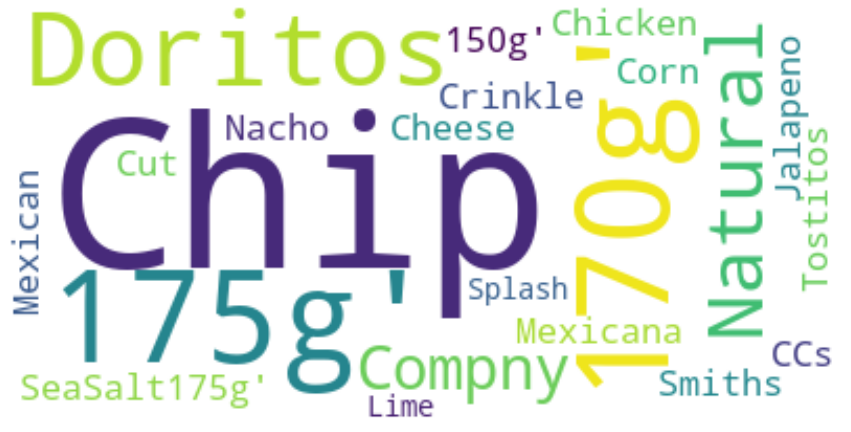

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


wordcloud = WordCloud(
    max_font_size=100, 
    max_words=500, 
    stopwords=STOPWORDS,
    background_color = 'white').generate(str(transactions.PROD_NAME.values))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Text(0, 0.5, 'Total Sales')

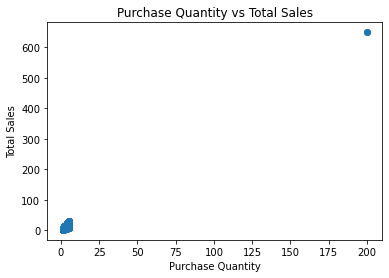

In [35]:
quantity = transactions.PROD_QTY
sales = transactions.TOT_SALES
plt.scatter(quantity, sales)
plt.title('Purchase Quantity vs Total Sales')
plt.xlabel('Purchase Quantity')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

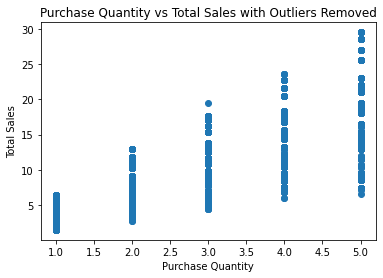

In [36]:
transactions_ol = transactions[transactions.PROD_QTY < 200]
qty_outrem = transactions_ol.PROD_QTY
sales_outrem = transactions_ol.TOT_SALES
plt.scatter(qty_outrem, sales_outrem)
plt.title('Purchase Quantity vs Total Sales with Outliers Removed')
plt.xlabel('Purchase Quantity')
plt.ylabel('Total Sales')

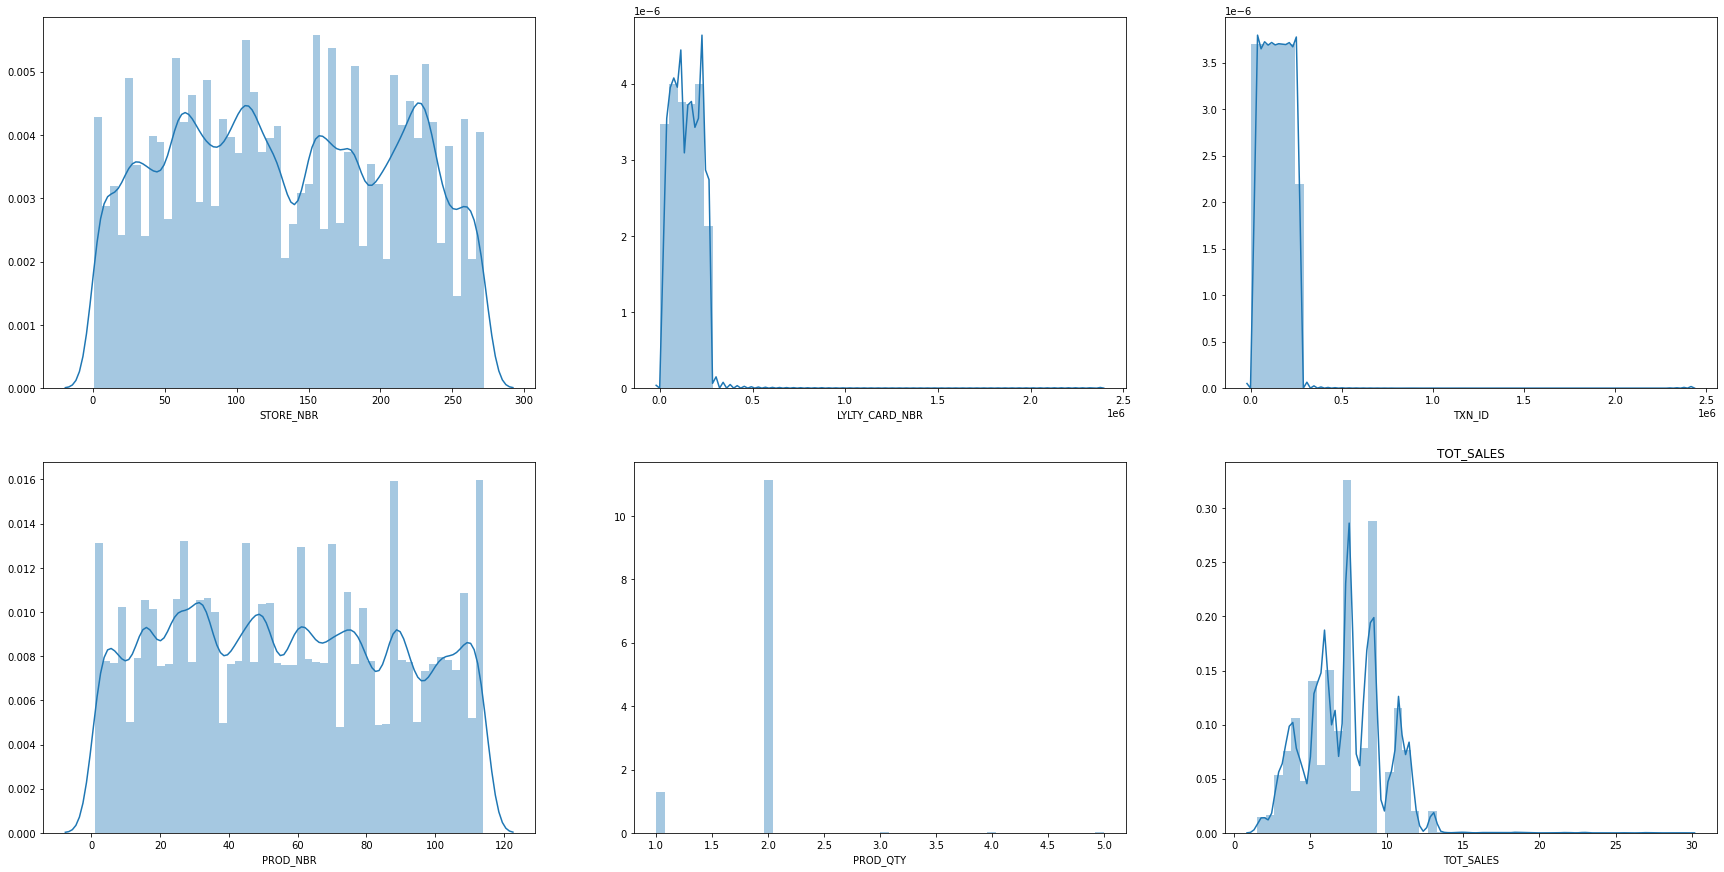

In [37]:
transactions_numeric = transactions_ol.drop(['DATE', 'PROD_NAME'], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,15))

for i, column in enumerate(transactions_numeric.columns):
    sns.distplot(transactions_numeric[column], ax=axes[i//3,i%3])
    plt.title(column)

In [38]:
prodnum_counts = transactions_ol.PROD_NBR.value_counts().tolist()
prodname_counts = transactions_ol.PROD_NAME.value_counts().tolist()

print(prodnum_counts == prodname_counts)

True


In [39]:
# Purchase Behaviour Dataset

In [40]:
purchase_behaviour.shape

(72637, 3)

In [41]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [42]:
purchase_behaviour.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [43]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [44]:
purchase_behaviour.describe().round(2)

,LYLTY_CARD_NBR
count,72637.00
mean,136185.93
std,89892.93
min,1000.00
25%,66202.00
50%,134040.00
75%,203375.00
max,2373711.00


In [45]:
type(purchase_behaviour['LYLTY_CARD_NBR'][0])

numpy.int64

In [46]:
type(purchase_behaviour['LIFESTAGE'][0])

str

In [47]:
type(purchase_behaviour['PREMIUM_CUSTOMER'][0])

str

In [48]:
lifestage_counts = purchase_behaviour.LIFESTAGE.value_counts()
premium_counts = purchase_behaviour.PREMIUM_CUSTOMER.value_counts()

print(lifestage_counts)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


Text(0.5, 1.0, 'Lifestage Frequencies')

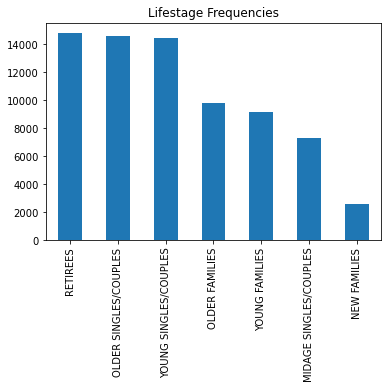

In [49]:
lifestage_counts.plot(kind='bar')
plt.title('Lifestage Frequencies')

In [50]:
print(premium_counts)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


Text(0.5, 1.0, 'Customer Status Frequencies')

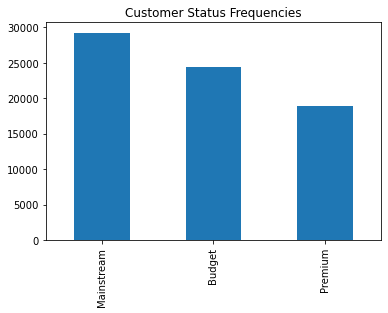

In [51]:
premium_counts.plot(kind='bar')
plt.title('Customer Status Frequencies')

In [52]:
# Merging both the datasets

In [53]:
print(len(transactions_ol.LYLTY_CARD_NBR.unique()))
print(len(purchase_behaviour.LYLTY_CARD_NBR.unique()))

72636
72637


In [54]:
dataset = pd.merge(transactions_ol, purchase_behaviour, on='LYLTY_CARD_NBR')
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [55]:
dataset.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
264828,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264829,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264830,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264831,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,YOUNG SINGLES/COUPLES,Premium


In [56]:
dataset.describe().round(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264833.00,264833.00,264833.00,264833.00,264833.00,264833.00
mean,135.08,135548.90,135157.72,56.58,1.91,7.30
std,76.78,80580.03,78133.05,32.83,0.34,2.53
min,1.00,1000.00,1.00,1.00,1.00,1.50
25%,70.00,70021.00,67600.00,28.00,2.00,5.40
50%,130.00,130357.00,135137.00,56.00,2.00,7.40
75%,203.00,203094.00,202700.00,85.00,2.00,9.20
max,272.00,2373711.00,2415841.00,114.00,5.00,29.50


In [57]:
# Feature Engineering
dataset.PROD_NAME.value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [58]:
# Determining which products are salsa
salsa = dataset.PROD_NAME[dataset.PROD_NAME.str.contains('|'.join(['salsa', 'Salsa'])).any(level=0)]
salsa.value_counts()

Old El Paso Salsa   Dip Chnky Tom Ht300g    3125
Old El Paso Salsa   Dip Tomato Med 300g     3114
Old El Paso Salsa   Dip Tomato Mild 300g    3085
Woolworths Mild     Salsa 300g              1491
Doritos Salsa Mild  300g                    1472
Smiths Crinkle Cut  Tomato Salsa 150g       1470
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Doritos Salsa       Medium 300g             1449
Woolworths Medium   Salsa 300g              1430
Name: PROD_NAME, dtype: int64

In [59]:
# It appears that 'Smiths Crinkle Cut Tomato Salsa 150g' and 'Red Rock Deli SR Salsa & Mzzrlla 150g' are chips so we will leave these and remove all other rows containing salsa as these are not chip products.

In [60]:
dataset.drop(dataset[dataset.PROD_NAME == 'Old El Paso Salsa   Dip Chnky Tom Ht300g'].index, inplace=True)
dataset.drop(dataset[dataset.PROD_NAME == 'Old El Paso Salsa   Dip Tomato Mild 300g'].index, inplace=True)
dataset.drop(dataset[dataset.PROD_NAME == 'Woolworths Mild     Salsa 300g'].index, inplace=True)
dataset.drop(dataset[dataset.PROD_NAME == 'Doritos Salsa Mild  300g'].index, inplace=True)
dataset.drop(dataset[dataset.PROD_NAME == 'Doritos Salsa       Medium 300g'].index, inplace=True)
dataset.drop(dataset[dataset.PROD_NAME == 'Woolworths Medium   Salsa 300g'].index, inplace=True)
dataset.drop(dataset[dataset.PROD_NAME == 'Old El Paso Salsa   Dip Tomato Med 300g'].index, inplace=True)

salsa = dataset.PROD_NAME[dataset.PROD_NAME.str.contains('|'.join(['salsa', 'Salsa'])).any(level=0)]
salsa.value_counts()

Smiths Crinkle Cut  Tomato Salsa 150g       1470
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Name: PROD_NAME, dtype: int64

In [61]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [62]:
# Now we can split the strings in PROD_NAME to obtain the brand and pack size.

In [63]:
prod_split = dataset.PROD_NAME.str.split()
print(prod_split.head())

0            [Natural, Chip, Compny, SeaSalt175g]
1                      [CCs, Nacho, Cheese, 175g]
2            [WW, Original, Stacked, Chips, 160g]
3                           [CCs, Original, 175g]
4    [Smiths, Crinkle, Cut, Chips, Chicken, 170g]
Name: PROD_NAME, dtype: object


In [64]:
# Altering the Brand Name
brand = prod_split.str[0]
brand = brand.replace(to_replace = 'Old', value = 'Old El Paso')
brand = brand.replace(to_replace = 'RRD', value = 'Red Rock Deli')
brand = brand.replace(to_replace = 'Grain', value = 'Grain Waves')
brand = brand.replace(to_replace = 'Natural', value = 'Natural Chip Co')
brand = brand.replace(to_replace = 'Red', value = 'Red Rock Deli')
brand = brand.replace(to_replace = 'WW', value = 'Woolworths')
brand = brand.replace(to_replace = 'Dorito', value = 'Doritos')
brand = brand.replace(to_replace = 'Infzns', value = 'Infuzions')
brand = brand.replace(to_replace = 'Smith', value = 'Smiths')
brand = brand.replace(to_replace = 'Snbts', value = 'Sunbites')
brand = brand.replace(to_replace = 'Burger', value = 'Burger Rings')
brand = brand.replace(to_replace = 'GrnWves', value = 'Grain Waves')
brand = brand.replace(to_replace = 'NCC', value = 'Natural Chip Co')
brand = brand.replace(to_replace = 'French', value = 'French Fries')

print(brand.value_counts())

Kettle             41288
Smiths             31822
Doritos            25224
Pringles           25102
Red Rock Deli      17779
Infuzions          14201
Thins              14075
Woolworths         11836
Cobs                9693
Tostitos            9471
Twisties            9454
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger Rings        1564
French Fries        1418
Name: PROD_NAME, dtype: int64


In [65]:
brand = brand.to_frame()
dataset_fe = dataset.merge(brand, left_index=True, right_index=True)

In [66]:
dataset_fe.rename(columns = {'PROD_NAME_x':'PROD_NAME'}, inplace = True) 
dataset_fe.rename(columns = {'PROD_NAME_y':'BRAND'}, inplace = True)
dataset_fe.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths


Text(0.5, 1.0, 'Brand Frequencies')

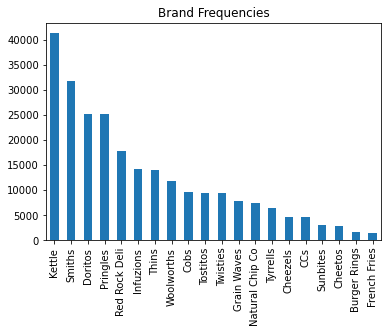

In [67]:
brand_counts = dataset_fe.BRAND.value_counts()
brand_counts.plot(kind='bar')
plt.title('Brand Frequencies')

In [68]:
pack_size = prod_split.str[-1]
pack_size = pack_size.replace(to_replace = 'Chckn175g', value = '175g')
pack_size = pack_size.replace(to_replace = 'Chicken270g', value = '270g')
pack_size = pack_size.replace(to_replace = 'Ht300g', value = '300g')
pack_size = pack_size.replace(to_replace = '210G', value = '210g')
pack_size = pack_size.replace(to_replace = '150G', value = '150g')
pack_size = pack_size.replace(to_replace = 'Chs&Onion170g', value = '170g')
pack_size = pack_size.replace(to_replace = 'SeaSalt175g', value = '175g')
pack_size = pack_size.replace(to_replace = 'Chli&S/Cream175G', value = '175g')
pack_size = pack_size.replace(to_replace = 'CutSalt/Vinegr175g', value = '175g')
pack_size = pack_size.replace(to_replace = 'Salt', value = '135g')

# Remove grams symbol and cast as int
pack_size = pack_size.str.replace(r'g', '')
pack_size = pack_size.astype(int)

pack_size.value_counts()

175    66389
150    43131
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PROD_NAME, dtype: int64

In [69]:
pack_size = pack_size.to_frame()
dataset_fe = dataset_fe.merge(pack_size, left_index=True, right_index=True)
dataset_fe.rename(columns = {'PROD_NAME_x':'PROD_NAME'}, inplace = True) 
dataset_fe.rename(columns = {'PROD_NAME_y':'PACK_SIZE'}, inplace = True)

dataset_fe.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,Woolworths,160
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs,175
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170


In [70]:
print('Largest Pack Size: ', dataset_fe.PACK_SIZE.max())
print('Smallest Pack Size: ', dataset_fe.PACK_SIZE.min())

Largest Pack Size:  380
Smallest Pack Size:  70


Text(0.5, 1.0, 'Pack Size Frequencies')

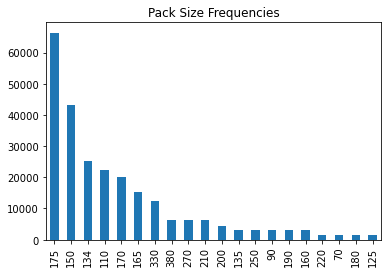

In [71]:
pack_size_counts = dataset_fe.PACK_SIZE.value_counts()
pack_size_counts.plot(kind='bar')
plt.title('Pack Size Frequencies')

In [72]:
dataset_fe.PACK_SIZE.value_counts().head()

175    66389
150    43131
134    25102
110    22387
170    19983
Name: PACK_SIZE, dtype: int64

In [73]:
dataset_fe.to_csv(r'data.csv', index = False)

In [74]:
# We would like to determine customer segements that spend the most on chips.
# We can segment the dataset by different factors such as lifestage and premium customer status, and even combinations of these of the form (lifestage, status) to determine which segments are most lucrative.

In [75]:
# Segment by Lifestage
new_fam = dataset_fe[dataset_fe.LIFESTAGE == 'NEW FAMILIES']
mid_sc = dataset_fe[dataset_fe.LIFESTAGE == 'MIDAGE SINGLES/COUPLES']
young_fam = dataset_fe[dataset_fe.LIFESTAGE == 'YOUNG FAMILIES']
old_fam = dataset_fe[dataset_fe.LIFESTAGE == 'OLDER FAMILIES']
young_sc = dataset_fe[dataset_fe.LIFESTAGE == 'YOUNG SINGLES/COUPLES']
old_sc = dataset_fe[dataset_fe.LIFESTAGE == 'OLDER SINGLES/COUPLES']
retirees = dataset_fe[dataset_fe.LIFESTAGE == 'RETIREES']

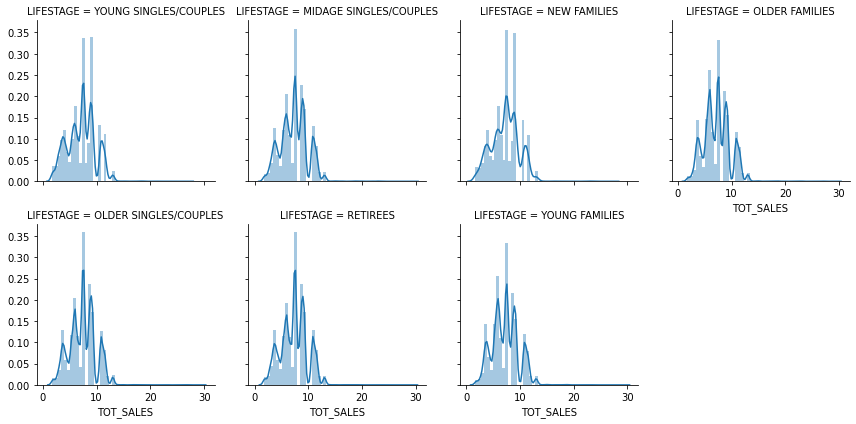

In [76]:
# Plotting the distribution of total sales for each segment.
g = sns.FacetGrid(dataset_fe, col="LIFESTAGE", col_wrap=4)
g.map(sns.distplot, "TOT_SALES")
plt.show()

In [77]:
# The mean total sales for each lifestage segment is around 7, so we subtract 7 from each to better see the differences, then order them from smallest to largest and plot in a barplot.

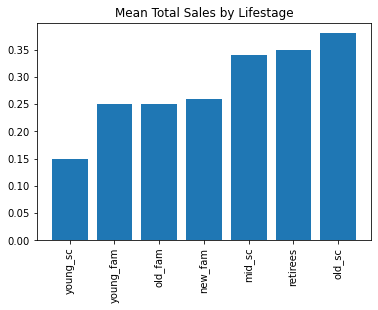

New Families:  7.26
Midage Singles & Couples:  7.34
Young Families:  7.25
Old Families:  7.25
Young Singles & Couples:  7.15
Old Singles & Couples:  7.38
Retirees:  7.35


In [78]:
D = {'new_fam' : round(new_fam.TOT_SALES.mean() - 7, 2),
     'mid_sc' : round(mid_sc.TOT_SALES.mean() - 7, 2),
     'young_fam' : round(young_fam.TOT_SALES.mean() - 7, 2),
     'old_fam' : round(old_fam.TOT_SALES.mean() - 7, 2),
     'young_sc' : round(young_sc.TOT_SALES.mean() - 7, 2),
     'old_sc' : round(old_sc.TOT_SALES.mean() - 7, 2),
     'retirees' : round(retirees.TOT_SALES.mean() - 7, 2)}

D = sorted(D.items(), key=lambda x: x[1])

D = dict(D)

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
plt.title('Mean Total Sales by Lifestage')
plt.show()

print('New Families: ', round(new_fam.TOT_SALES.mean(), 2))
print('Midage Singles & Couples: ', round(mid_sc.TOT_SALES.mean(), 2))
print('Young Families: ', round(young_fam.TOT_SALES.mean(), 2))
print('Old Families: ', round(old_fam.TOT_SALES.mean(), 2))
print('Young Singles & Couples: ', round(young_sc.TOT_SALES.mean(), 2))
print('Old Singles & Couples: ', round(old_sc.TOT_SALES.mean(), 2))
print('Retirees: ', round(retirees.TOT_SALES.mean(), 2))

In [79]:
# Segment by Premium Customer Status
mainstream = dataset_fe[dataset_fe.PREMIUM_CUSTOMER == 'Mainstream']
budget = dataset_fe[dataset_fe.PREMIUM_CUSTOMER == 'Budget']
premium = dataset_fe[dataset_fe.PREMIUM_CUSTOMER == 'Premium']

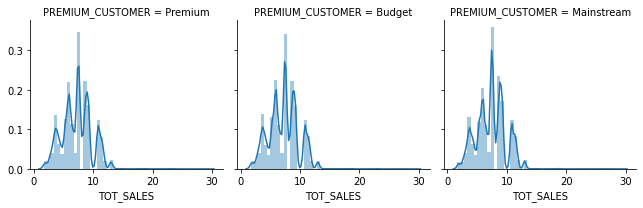

In [80]:
g = sns.FacetGrid(dataset_fe, col="PREMIUM_CUSTOMER", col_wrap=4)
g.map(sns.distplot, "TOT_SALES")
plt.show()

In [81]:
# When examining the mean of total sales by segment, we find the means are again all close to 7, so we subtract 7 to highlight the differences and plot as a barplot.

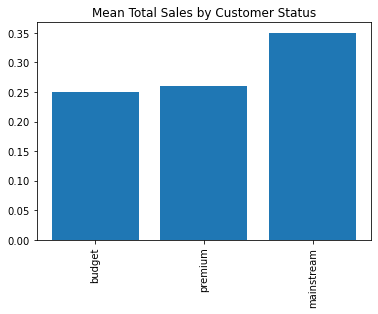

Budget:  7.25
Mainstream:  7.35
Premium:  7.26


In [82]:
d = {'mainstream' : round(mainstream.TOT_SALES.mean() - 7, 2),
     'budget' : round(budget.TOT_SALES.mean() - 7, 2),
     'premium' : round(premium.TOT_SALES.mean() - 7, 2)}

d = sorted(d.items(), key=lambda x: x[1])

d = dict(d)

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.xticks(rotation=90)
plt.title('Mean Total Sales by Customer Status')
plt.show()


print('Budget: ', round(budget.TOT_SALES.mean(), 2))
print('Mainstream: ', round(mainstream.TOT_SALES.mean(), 2))
print('Premium: ', round(premium.TOT_SALES.mean(), 2))

In [83]:
# Segment by Lifestage and Premium Status

In [84]:
# As there are 7 lifestage segments and 3 customer status categories, segmenting by lifestage-status combinations will produce 21 segments.

In [85]:
newfam_mainstream = new_fam[new_fam.PREMIUM_CUSTOMER == 'Mainstream']
newfam_budget = new_fam[new_fam.PREMIUM_CUSTOMER == 'Budget']
newfam_premium = new_fam[new_fam.PREMIUM_CUSTOMER == 'Premium']

midsc_mainstream = mid_sc[mid_sc.PREMIUM_CUSTOMER == 'Mainstream']
midsc_budget = mid_sc[mid_sc.PREMIUM_CUSTOMER == 'Budget']
midsc_premium = mid_sc[mid_sc.PREMIUM_CUSTOMER == 'Premium']

youngfam_mainstream = young_fam[young_fam.PREMIUM_CUSTOMER == 'Mainstream']
youngfam_budget = young_fam[young_fam.PREMIUM_CUSTOMER == 'Budget']
youngfam_premium = young_fam[young_fam.PREMIUM_CUSTOMER == 'Premium']

oldfam_mainstream = old_fam[old_fam.PREMIUM_CUSTOMER == 'Mainstream']
oldfam_budget = old_fam[old_fam.PREMIUM_CUSTOMER == 'Budget']
oldfam_premium = old_fam[old_fam.PREMIUM_CUSTOMER == 'Premium']

youngsc_mainstream = young_sc[young_sc.PREMIUM_CUSTOMER == 'Mainstream']
youngsc_budget = young_sc[young_sc.PREMIUM_CUSTOMER == 'Budget']
youngsc_premium = young_sc[young_sc.PREMIUM_CUSTOMER == 'Premium']

oldsc_mainstream = old_sc[old_sc.PREMIUM_CUSTOMER == 'Mainstream']
oldsc_budget = old_sc[old_sc.PREMIUM_CUSTOMER == 'Budget']
oldsc_premium = old_sc[old_sc.PREMIUM_CUSTOMER == 'Premium']

retirees_mainstream = retirees[retirees.PREMIUM_CUSTOMER == 'Mainstream']
retirees_budget = retirees[retirees.PREMIUM_CUSTOMER == 'Budget']
retirees_premium = retirees[retirees.PREMIUM_CUSTOMER == 'Premium']

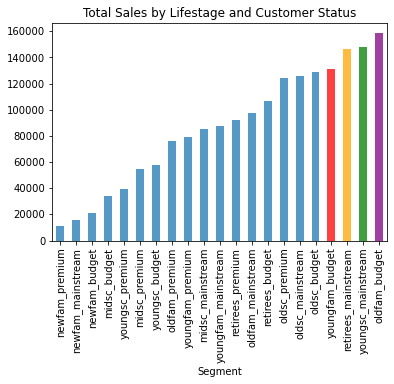

In [86]:
d = {
'newfam_mainstream' : round(newfam_mainstream.TOT_SALES.sum(), 2),
'newfam_budget' : round(newfam_budget.TOT_SALES.sum(), 2),
'newfam_premium' : round(newfam_premium.TOT_SALES.sum(), 2),
'midsc_mainstream' : round(midsc_mainstream.TOT_SALES.sum(), 2),
'midsc_budget' : round(midsc_budget.TOT_SALES.sum(), 2),
'midsc_premium' : round(midsc_premium.TOT_SALES.sum(), 2),
'youngfam_mainstream' : round(youngfam_mainstream.TOT_SALES.sum(), 2),
'youngfam_budget' : round(youngfam_budget.TOT_SALES.sum(), 2),
'youngfam_premium' : round(youngfam_premium.TOT_SALES.sum(), 2),
'oldfam_mainstream' : round(oldfam_mainstream.TOT_SALES.sum(), 2),
'oldfam_budget' : round(oldfam_budget.TOT_SALES.sum(), 2),
'oldfam_premium' : round(oldfam_premium.TOT_SALES.sum(), 2),
'youngsc_mainstream' : round(youngsc_mainstream.TOT_SALES.sum(), 2),
'youngsc_budget' : round(youngsc_budget.TOT_SALES.sum(), 2),
'youngsc_premium' : round(youngsc_premium.TOT_SALES.sum(), 2),
'oldsc_mainstream' : round(oldsc_mainstream.TOT_SALES.sum(), 2),
'oldsc_budget' : round(oldsc_budget.TOT_SALES.sum(), 2),
'oldsc_premium' : round(oldsc_premium.TOT_SALES.sum(), 2),
'retirees_mainstream' : round(retirees_mainstream.TOT_SALES.sum(), 2),
'retirees_budget' : round(retirees_budget.TOT_SALES.sum(), 2),
'retirees_premium' : round(retirees_premium.TOT_SALES.sum(), 2)}

d = sorted(d.items(), key=lambda x: x[1])

#d = dict(d)

#colour_dict = {'oldfam_budget': 'red',
#          'youngsc_mainstream': 'orange',
#          'retirees_mainstream': 'lightgreen',
#          'youngfam_budget': 'darkgreen'}
#plt.bar(range(len(d)), d.values(), align='center')
#plt.xticks(range(len(d)), list(d.keys()))
#plt.xticks(rotation=90)

tot_sales_df = pd.DataFrame(d, columns=['Segment', 'Tot_Sales'])
tot_sales_df = tot_sales_df.set_index('Segment')
tot_sales_df

ax = tot_sales_df.plot(kind='bar',stacked = False, alpha=0.75, rot=90, fontsize=10)
ax.legend_.remove()

ax.patches[tot_sales_df.index.get_indexer(['oldfam_budget'])[0]].set_facecolor('purple')
ax.patches[tot_sales_df.index.get_indexer(['youngsc_mainstream'])[0]].set_facecolor('green')
ax.patches[tot_sales_df.index.get_indexer(['retirees_mainstream'])[0]].set_facecolor('orange')
ax.patches[tot_sales_df.index.get_indexer(['youngfam_budget'])[0]].set_facecolor('red')

plt.title('Total Sales by Lifestage and Customer Status')
plt.show()

In [87]:
print('newfam_mainstream total sales: ', round(newfam_mainstream.TOT_SALES.sum(), 2))
print('newfam_budget total sales: ', round(newfam_budget.TOT_SALES.sum(), 2))
print('newfam_premium total sales: ', round(newfam_premium.TOT_SALES.sum(), 2))
print()
print('midsc_mainstream total sales: ', round(midsc_mainstream.TOT_SALES.sum(), 2))
print('midsc_budget total sales: ', round(midsc_budget.TOT_SALES.sum(), 2))
print('midsc_premium total sales: ', round(midsc_premium.TOT_SALES.sum(), 2))
print()
print('youngfam_mainstream total sales: ', round(youngfam_mainstream.TOT_SALES.sum(), 2))
print('youngfam_budget total sales: ', round(youngfam_budget.TOT_SALES.sum(), 2))
print('youngfam_premium total sales: ', round(youngfam_premium.TOT_SALES.sum(), 2))
print()
print('oldfam_mainstream total sales: ', round(oldfam_mainstream.TOT_SALES.sum(), 2))
print('oldfam_budget total sales: ', round(oldfam_budget.TOT_SALES.sum(), 2))
print('oldfam_premium total sales: ', round(oldfam_premium.TOT_SALES.sum(), 2))
print()
print('youngsc_mainstream total sales: ', round(youngsc_mainstream.TOT_SALES.sum(), 2))
print('youngsc_budget total sales: ', round(youngsc_budget.TOT_SALES.sum(), 2))
print('youngsc_premium total sales: ', round(youngsc_premium.TOT_SALES.sum(), 2))
print()
print('oldsc_mainstream total sales: ', round(oldsc_mainstream.TOT_SALES.sum(), 2))
print('oldsc_budget total sales: ', round(oldsc_budget.TOT_SALES.sum(), 2))
print('oldsc_premium total sales: ', round(oldsc_premium.TOT_SALES.sum(), 2))
print()
print('retirees_mainstream total sales: ', round(retirees_mainstream.TOT_SALES.sum(), 2))
print('retirees_budget total sales: ', round(retirees_budget.TOT_SALES.sum(), 2))
print('retirees_premium total sales: ', round(retirees_premium.TOT_SALES.sum(), 2))

newfam_mainstream total sales:  16078.0
newfam_budget total sales:  20716.05
newfam_premium total sales:  10861.7

midsc_mainstream total sales:  85262.75
midsc_budget total sales:  33705.4
midsc_premium total sales:  55042.35

youngfam_mainstream total sales:  87227.85
youngfam_budget total sales:  130919.05
youngfam_premium total sales:  79249.1

oldfam_mainstream total sales:  97280.85
oldfam_budget total sales:  158379.95
oldfam_premium total sales:  75983.0

youngsc_mainstream total sales:  148337.2
youngsc_budget total sales:  57622.4
youngsc_premium total sales:  39347.9

oldsc_mainstream total sales:  125737.1
oldsc_budget total sales:  128683.8
oldsc_premium total sales:  124457.05

retirees_mainstream total sales:  146328.75
retirees_budget total sales:  106606.2
retirees_premium total sales:  91951.95


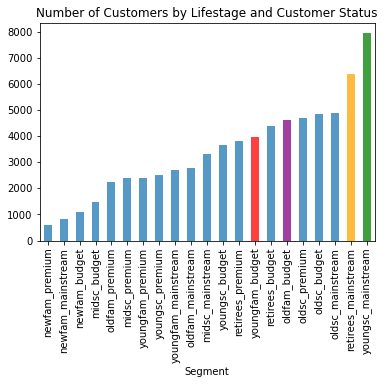

In [112]:
d = {
'newfam_mainstream' : len(newfam_mainstream.LYLTY_CARD_NBR.unique()),
'newfam_budget' : len(newfam_budget.LYLTY_CARD_NBR.unique()),
'newfam_premium' : len(newfam_premium.LYLTY_CARD_NBR.unique()),
'midsc_mainstream' : len(midsc_mainstream.LYLTY_CARD_NBR.unique()),
'midsc_budget' : len(midsc_budget.LYLTY_CARD_NBR.unique()),
'midsc_premium' : len(midsc_premium.LYLTY_CARD_NBR.unique()),
'youngfam_mainstream' : len(youngfam_mainstream.LYLTY_CARD_NBR.unique()),
'youngfam_budget' : len(youngfam_budget.LYLTY_CARD_NBR.unique()),
'youngfam_premium' : len(youngfam_premium.LYLTY_CARD_NBR.unique()),
'oldfam_mainstream' : len(oldfam_mainstream.LYLTY_CARD_NBR.unique()),
'oldfam_budget' : len(oldfam_budget.LYLTY_CARD_NBR.unique()),
'oldfam_premium' : len(oldfam_premium.LYLTY_CARD_NBR.unique()),
'youngsc_mainstream' : len(youngsc_mainstream.LYLTY_CARD_NBR.unique()),
'youngsc_budget' : len(youngsc_budget.LYLTY_CARD_NBR.unique()),
'youngsc_premium' : len(youngsc_premium.LYLTY_CARD_NBR.unique()),
'oldsc_mainstream' : len(oldsc_mainstream.LYLTY_CARD_NBR.unique()),
'oldsc_budget' : len(oldsc_budget.LYLTY_CARD_NBR.unique()),
'oldsc_premium' : len(oldsc_premium.LYLTY_CARD_NBR.unique()),
'retirees_mainstream' : len(retirees_mainstream.LYLTY_CARD_NBR.unique()),
'retirees_budget' : len(retirees_budget.LYLTY_CARD_NBR.unique()),
'retirees_premium' : len(retirees_premium.LYLTY_CARD_NBR.unique())}

d = sorted(d.items(), key=lambda x: x[1])

#d = dict(d)
#
#plt.bar(range(len(d)), d.values(), align='center', color = )
#plt.xticks(range(len(d)), list(d.keys()))
#plt.title('Number of Unique Customers by Lifestage and Customer Status')
#plt.xticks(rotation=90)
#plt.show()

num_customers_df = pd.DataFrame(d, columns=['Segment', 'Num_Cust'])
num_customers_df = num_customers_df.set_index('Segment')
num_customers_df

ax = num_customers_df.plot(kind='bar',stacked = False, alpha=0.75, rot=90, fontsize=10)
ax.legend_.remove()

ax.patches[num_customers_df.index.get_indexer(['oldfam_budget'])[0]].set_facecolor('purple')
ax.patches[num_customers_df.index.get_indexer(['youngsc_mainstream'])[0]].set_facecolor('green')
ax.patches[num_customers_df.index.get_indexer(['retirees_mainstream'])[0]].set_facecolor('orange')
ax.patches[num_customers_df.index.get_indexer(['youngfam_budget'])[0]].set_facecolor('red')

plt.title('Number of Customers by Lifestage and Customer Status')
plt.show()

In [89]:
print('newfam_mainstream mean total sales: ', round(newfam_mainstream.TOT_SALES.mean(), 2))
print('newfam_budget mean total sales: ', round(newfam_budget.TOT_SALES.mean(), 2))
print('newfam_premium mean total sales: ', round(newfam_premium.TOT_SALES.mean(), 2))
print()
print('midsc_mainstream mean total sales: ', round(midsc_mainstream.TOT_SALES.mean(), 2))
print('midsc_budget mean total sales: ', round(midsc_budget.TOT_SALES.mean(), 2))
print('midsc_premium mean total sales: ', round(midsc_premium.TOT_SALES.mean(), 2))
print()
print('youngfam_mainstream mean total sales: ', round(youngfam_mainstream.TOT_SALES.mean(), 2))
print('youngfam_budget mean total sales: ', round(youngfam_budget.TOT_SALES.mean(), 2))
print('youngfam_premium mean total sales: ', round(youngfam_premium.TOT_SALES.mean(), 2))
print()
print('oldfam_mainstream mean total sales: ', round(oldfam_mainstream.TOT_SALES.mean(), 2))
print('oldfam_budget mean total sales: ', round(oldfam_budget.TOT_SALES.mean(), 2))
print('oldfam_premium mean total sales: ', round(oldfam_premium.TOT_SALES.mean(), 2))
print()
print('youngsc_mainstream mean total sales: ', round(youngsc_mainstream.TOT_SALES.mean(), 2))
print('youngsc_budget mean total sales: ', round(youngsc_budget.TOT_SALES.mean(), 2))
print('youngsc_premium mean total sales: ', round(youngsc_premium.TOT_SALES.mean(), 2))
print()
print('oldsc_mainstream mean total sales: ', round(oldsc_mainstream.TOT_SALES.mean(), 2))
print('oldsc_budget mean total sales: ', round(oldsc_budget.TOT_SALES.mean(), 2))
print('oldsc_premium mean total sales: ', round(oldsc_premium.TOT_SALES.mean(), 2))
print()
print('retirees_mainstream mean total sales: ', round(retirees_mainstream.TOT_SALES.mean(), 2))
print('retirees_budget mean total sales: ', round(retirees_budget.TOT_SALES.mean(), 2))
print('retirees_premium mean total sales: ', round(retirees_premium.TOT_SALES.mean(), 2))

newfam_mainstream mean total sales:  7.29
newfam_budget mean total sales:  7.28
newfam_premium mean total sales:  7.2

midsc_mainstream mean total sales:  7.61
midsc_budget mean total sales:  7.07
midsc_premium mean total sales:  7.12

youngfam_mainstream mean total sales:  7.2
youngfam_budget mean total sales:  7.28
youngfam_premium mean total sales:  7.26

oldfam_mainstream mean total sales:  7.25
oldfam_budget mean total sales:  7.26
oldfam_premium mean total sales:  7.2

youngsc_mainstream mean total sales:  7.53
youngsc_budget mean total sales:  6.63
youngsc_premium mean total sales:  6.65

oldsc_mainstream mean total sales:  7.28
oldsc_budget mean total sales:  7.42
oldsc_premium mean total sales:  7.43

retirees_mainstream mean total sales:  7.24
retirees_budget mean total sales:  7.42
retirees_premium mean total sales:  7.43


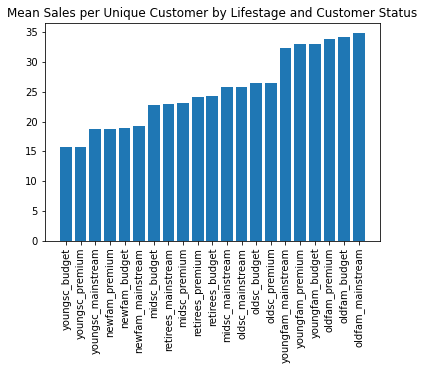

In [90]:
d = {
'newfam_mainstream' : round(newfam_mainstream.TOT_SALES.sum() / len(newfam_mainstream.LYLTY_CARD_NBR.unique()), 2),
'newfam_budget' : round(newfam_budget.TOT_SALES.sum() / len(newfam_budget.LYLTY_CARD_NBR.unique()), 2),
'newfam_premium' : round(newfam_premium.TOT_SALES.sum() / len(newfam_premium.LYLTY_CARD_NBR.unique()), 2),
'midsc_mainstream' : round(midsc_mainstream.TOT_SALES.sum() / len(midsc_mainstream.LYLTY_CARD_NBR.unique()), 2),
'midsc_budget' : round(midsc_budget.TOT_SALES.sum() / len(midsc_budget.LYLTY_CARD_NBR.unique()), 2),
'midsc_premium' : round(midsc_premium.TOT_SALES.sum() / len(midsc_premium.LYLTY_CARD_NBR.unique()), 2),
'youngfam_mainstream' : round(youngfam_mainstream.TOT_SALES.sum() / len(youngfam_mainstream.LYLTY_CARD_NBR.unique()), 2),
'youngfam_budget' : round(youngfam_budget.TOT_SALES.sum() / len(youngfam_budget.LYLTY_CARD_NBR.unique()), 2),
'youngfam_premium' : round(youngfam_premium.TOT_SALES.sum() / len(youngfam_premium.LYLTY_CARD_NBR.unique()), 2),
'oldfam_mainstream' : round(oldfam_mainstream.TOT_SALES.sum() / len(oldfam_mainstream.LYLTY_CARD_NBR.unique()), 2),
'oldfam_budget' : round(oldfam_budget.TOT_SALES.sum() / len(oldfam_budget.LYLTY_CARD_NBR.unique()), 2),
'oldfam_premium' : round(oldfam_premium.TOT_SALES.sum() / len(oldfam_premium.LYLTY_CARD_NBR.unique()), 2),
'youngsc_mainstream' : round(youngsc_mainstream.TOT_SALES.sum() / len(youngsc_mainstream.LYLTY_CARD_NBR.unique()), 2),
'youngsc_budget' : round(youngsc_budget.TOT_SALES.sum() / len(youngsc_budget.LYLTY_CARD_NBR.unique()), 2),
'youngsc_premium' : round(youngsc_premium.TOT_SALES.sum() / len(youngsc_premium.LYLTY_CARD_NBR.unique()), 2),
'oldsc_mainstream' : round(oldsc_mainstream.TOT_SALES.sum() / len(oldsc_mainstream.LYLTY_CARD_NBR.unique()), 2),
'oldsc_budget' : round(oldsc_budget.TOT_SALES.sum() / len(oldsc_budget.LYLTY_CARD_NBR.unique()), 2),
'oldsc_premium' : round(oldsc_premium.TOT_SALES.sum() / len(oldsc_premium.LYLTY_CARD_NBR.unique()), 2),
'retirees_mainstream' : round(retirees_mainstream.TOT_SALES.sum() / len(retirees_mainstream.LYLTY_CARD_NBR.unique()), 2),
'retirees_budget' : round(retirees_budget.TOT_SALES.sum() / len(retirees_budget.LYLTY_CARD_NBR.unique()), 2),
'retirees_premium' : round(retirees_premium.TOT_SALES.sum() / len(retirees_premium.LYLTY_CARD_NBR.unique()), 2)}

d = sorted(d.items(), key=lambda x: x[1])

d = dict(d)

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Mean Sales per Unique Customer by Lifestage and Customer Status')
plt.xticks(rotation=90)
plt.show()

In [91]:
print('newfam_mainstream: ', round(newfam_mainstream.TOT_SALES.sum() / len(newfam_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('newfam_budget: ', round(newfam_budget.TOT_SALES.sum() / len(newfam_budget.LYLTY_CARD_NBR.unique()), 2))
print('newfam_premium: ', round(newfam_premium.TOT_SALES.sum() / len(newfam_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('midsc_mainstream: ', round(midsc_mainstream.TOT_SALES.sum() / len(midsc_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('midsc_budget: ', round(midsc_budget.TOT_SALES.sum() / len(midsc_budget.LYLTY_CARD_NBR.unique()), 2))
print('midsc_premium: ', round(midsc_premium.TOT_SALES.sum() / len(midsc_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('youngfam_mainstream: ', round(youngfam_mainstream.TOT_SALES.sum() / len(youngfam_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('youngfam_budget: ', round(youngfam_budget.TOT_SALES.sum() / len(youngfam_budget.LYLTY_CARD_NBR.unique()), 2))
print('youngfam_premium: ', round(youngfam_premium.TOT_SALES.sum() / len(youngfam_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('oldfam_mainstream: ', round(oldfam_mainstream.TOT_SALES.sum() / len(oldfam_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('oldfam_budget: ', round(oldfam_budget.TOT_SALES.sum() / len(oldfam_budget.LYLTY_CARD_NBR.unique()), 2))
print('oldfam_premium: ', round(oldfam_premium.TOT_SALES.sum() / len(oldfam_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('youngsc_mainstream: ', round(youngsc_mainstream.TOT_SALES.sum() / len(youngsc_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('youngsc_budget: ', round(youngsc_budget.TOT_SALES.sum() / len(youngsc_budget.LYLTY_CARD_NBR.unique()), 2))
print('youngsc_premium: ', round(youngsc_premium.TOT_SALES.sum() / len(youngsc_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('oldsc_mainstream: ', round(oldsc_mainstream.TOT_SALES.sum() / len(oldsc_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('oldsc_budget: ', round(oldsc_budget.TOT_SALES.sum() / len(oldsc_budget.LYLTY_CARD_NBR.unique()), 2))
print('oldsc_premium: ', round(oldsc_premium.TOT_SALES.sum() / len(oldsc_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('retirees_mainstream: ', round(retirees_mainstream.TOT_SALES.sum() / len(retirees_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('retirees_budget: ', round(retirees_budget.TOT_SALES.sum() / len(retirees_budget.LYLTY_CARD_NBR.unique()), 2))
print('retirees_premium: ', round(retirees_premium.TOT_SALES.sum() / len(retirees_premium.LYLTY_CARD_NBR.unique()), 2))

newfam_mainstream:  19.28
newfam_budget:  18.97
newfam_premium:  18.82

midsc_mainstream:  25.82
midsc_budget:  22.71
midsc_premium:  23.12

youngfam_mainstream:  32.39
youngfam_budget:  33.05
youngfam_premium:  32.97

oldfam_mainstream:  34.79
oldfam_budget:  34.27
oldfam_premium:  33.92

youngsc_mainstream:  18.71
youngsc_budget:  15.68
youngsc_premium:  15.75

oldsc_mainstream:  25.82
oldsc_budget:  26.46
oldsc_premium:  26.51

retirees_mainstream:  22.93
retirees_budget:  24.25
retirees_premium:  24.06


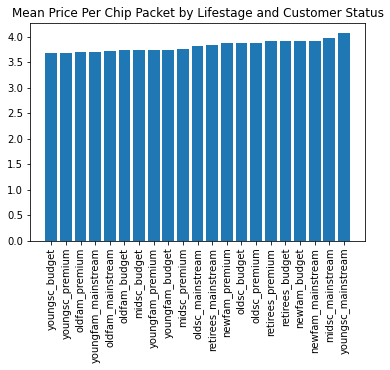

In [92]:
d = {
'newfam_mainstream' : (newfam_mainstream.TOT_SALES.sum() / newfam_mainstream.PROD_QTY.sum()),
'newfam_budget' : (newfam_budget.TOT_SALES.sum() / newfam_budget.PROD_QTY.sum()),
'newfam_premium' : (newfam_premium.TOT_SALES.sum() / newfam_premium.PROD_QTY.sum()),
'midsc_mainstream' : (midsc_mainstream.TOT_SALES.sum() / midsc_mainstream.PROD_QTY.sum()),
'midsc_budget' : (midsc_budget.TOT_SALES.sum() / midsc_budget.PROD_QTY.sum()),
'midsc_premium' : (midsc_premium.TOT_SALES.sum() / midsc_premium.PROD_QTY.sum()),
'youngfam_mainstream' : (youngfam_mainstream.TOT_SALES.sum() / youngfam_mainstream.PROD_QTY.sum()),
'youngfam_budget' : (youngfam_budget.TOT_SALES.sum() / youngfam_budget.PROD_QTY.sum()),
'youngfam_premium' : (youngfam_premium.TOT_SALES.sum() / youngfam_premium.PROD_QTY.sum()),
'oldfam_mainstream' : (oldfam_mainstream.TOT_SALES.sum() / oldfam_mainstream.PROD_QTY.sum()),
'oldfam_budget' : (oldfam_budget.TOT_SALES.sum() / oldfam_budget.PROD_QTY.sum()),
'oldfam_premium' : (oldfam_premium.TOT_SALES.sum() / oldfam_premium.PROD_QTY.sum()),
'youngsc_mainstream' : (youngsc_mainstream.TOT_SALES.sum() / youngsc_mainstream.PROD_QTY.sum()),
'youngsc_budget' : (youngsc_budget.TOT_SALES.sum() / youngsc_budget.PROD_QTY.sum()),
'youngsc_premium' : (youngsc_premium.TOT_SALES.sum() / youngsc_premium.PROD_QTY.sum()),
'oldsc_mainstream' : (oldsc_mainstream.TOT_SALES.sum() / oldsc_mainstream.PROD_QTY.sum()),
'oldsc_budget' : (oldsc_budget.TOT_SALES.sum() / oldsc_budget.PROD_QTY.sum()),
'oldsc_premium' : (oldsc_premium.TOT_SALES.sum() / oldsc_premium.PROD_QTY.sum()),
'retirees_mainstream' : (retirees_mainstream.TOT_SALES.sum() / retirees_mainstream.PROD_QTY.sum()),
'retirees_budget' : (retirees_budget.TOT_SALES.sum() / retirees_budget.PROD_QTY.sum()),
'retirees_premium' : (retirees_premium.TOT_SALES.sum() / retirees_premium.PROD_QTY.sum())}

d = sorted(d.items(), key=lambda x: x[1])

d = dict(d)

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.xticks(rotation=90)
plt.title('Mean Price Per Chip Packet by Lifestage and Customer Status')
plt.show()

Text(0.5, 1.0, 'Young Singles And Couples Most Popular Brands')

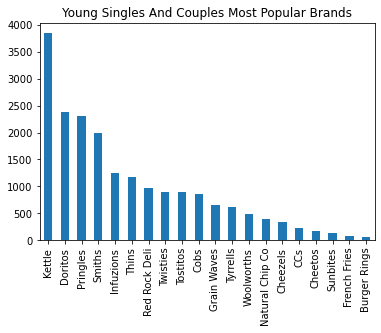

In [93]:
youngsc_mainstream_brands = youngsc_mainstream.BRAND.value_counts()
youngsc_mainstream_brands.plot(kind='bar')
plt.title('Young Singles And Couples Most Popular Brands')

Text(0.5, 1.0, 'Young Singles And Couples Most Popular Pack Size')

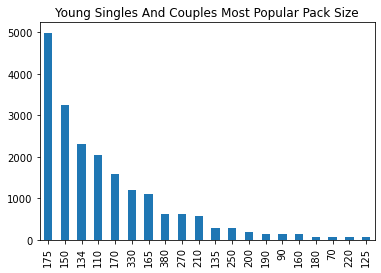

In [94]:
youngsc_mainstream_packsize = youngsc_mainstream.PACK_SIZE.value_counts()
youngsc_mainstream_packsize.plot(kind='bar')
plt.title('Young Singles And Couples Most Popular Pack Size')

Text(0.5, 1.0, 'Old Families Most Popular Brands')

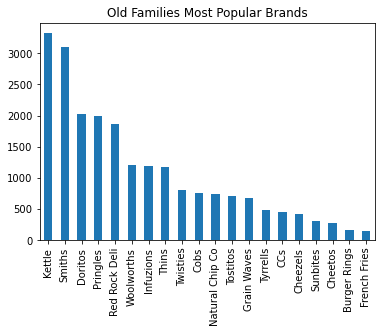

In [95]:
oldfam_budget_brands = oldfam_budget.BRAND.value_counts()
oldfam_budget_brands.plot(kind='bar')
plt.title('Old Families Most Popular Brands')

Text(0.5, 1.0, 'Old Families Most Popular Pack Size')

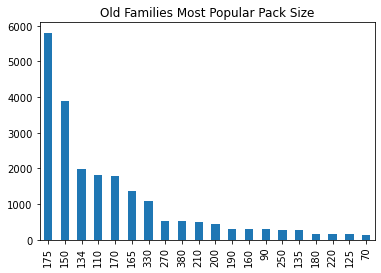

In [96]:
oldfam_budget_packsize = oldfam_budget.PACK_SIZE.value_counts()
oldfam_budget_packsize.plot(kind='bar')
plt.title('Old Families Most Popular Pack Size')

Text(0.5, 1.0, 'Most Popular Stores by Number of Transactions')

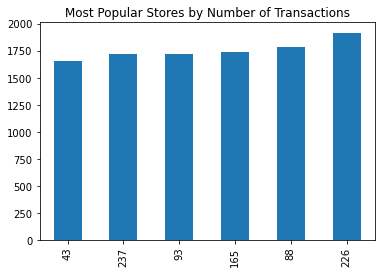

In [97]:
# Most popular stores
popular_stores = dataset_fe.STORE_NBR.value_counts().head(6)
popular_stores = popular_stores.sort_values(ascending=True)
popular_stores.plot(kind='bar')
plt.title('Most Popular Stores by Number of Transactions')

In [98]:
store226 = dataset_fe[dataset_fe.STORE_NBR == 226]
store88 = dataset_fe[dataset_fe.STORE_NBR == 88]
store93 = dataset_fe[dataset_fe.STORE_NBR == 93]
store165 = dataset_fe[dataset_fe.STORE_NBR == 165]
store237 = dataset_fe[dataset_fe.STORE_NBR == 237]
store43 = dataset_fe[dataset_fe.STORE_NBR == 43]

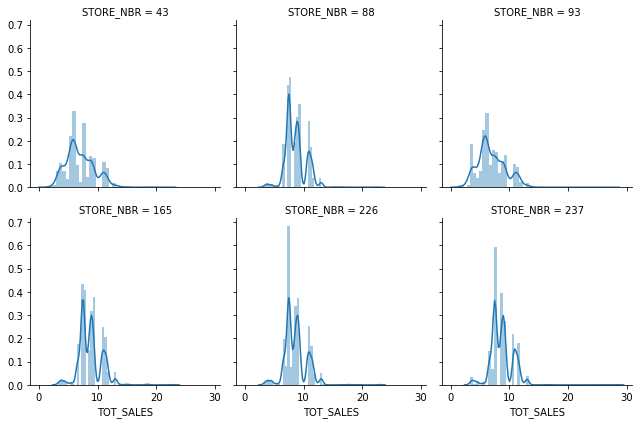

In [99]:
store_list = [226, 88, 165, 93, 237, 43]
pop_stores = dataset_fe[dataset_fe.STORE_NBR.isin(store_list)]

g = sns.FacetGrid(pop_stores, col="STORE_NBR", col_wrap=3)
g.map(sns.distplot, "TOT_SALES")
plt.show()

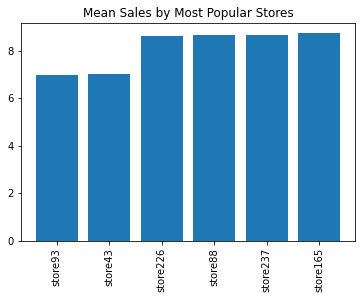

Store 226:  8.63
Store 88:  8.65
Store 93:  6.99
Store 165:  8.72
Store 237:  8.65
Store 43:  7.01


In [100]:
dic = {'store226' : round(store226.TOT_SALES.mean(), 2),
     'store88' : round(store88.TOT_SALES.mean(), 2),
     'store93' : round(store93.TOT_SALES.mean(), 2),
     'store165' : round(store165.TOT_SALES.mean(), 2),
     'store237' : round(store237.TOT_SALES.mean(), 2),
     'store43' : round(store43.TOT_SALES.mean(), 2)}

dic = sorted(dic.items(), key=lambda x: x[1])

dic = dict(dic)

plt.bar(range(len(dic)), dic.values(), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.title('Mean Sales by Most Popular Stores')
plt.xticks(rotation=90)
plt.show()

print('Store 226: ', round(store226.TOT_SALES.mean(), 2))
print('Store 88: ', round(store88.TOT_SALES.mean(), 2))
print('Store 93: ', round(store93.TOT_SALES.mean(), 2))
print('Store 165: ', round(store165.TOT_SALES.mean(), 2))
print('Store 237: ', round(store237.TOT_SALES.mean(), 2))
print('Store 43: ', round(store43.TOT_SALES.mean(), 2))

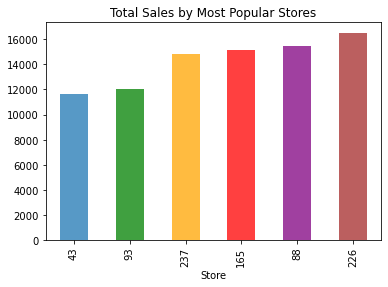

In [101]:
dic = {'226' : round(store226.TOT_SALES.sum(), 2),
     '88' : round(store88.TOT_SALES.sum(), 2),
     '93' : round(store93.TOT_SALES.sum(), 2),
     '165' : round(store165.TOT_SALES.sum(), 2),
     '237' : round(store237.TOT_SALES.sum(), 2),
     '43' : round(store43.TOT_SALES.sum(), 2)}

dic = sorted(dic.items(), key=lambda x: x[1])

#dic = dict(dic)
#
#plt.bar(range(len(dic)), dic.values(), align='center')
#plt.xticks(range(len(dic)), list(dic.keys()))
#plt.title('Total Sales by Most Popular Stores')
#plt.xticks(rotation=90)
#plt.show()
#
#print('Store 226: ', round(store226.TOT_SALES.sum(), 2))
#print('Store 88: ', round(store88.TOT_SALES.sum(), 2))
#print('Store 93: ', round(store93.TOT_SALES.sum(), 2))
#print('Store 165: ', round(store165.TOT_SALES.sum(), 2))
#print('Store 237: ', round(store237.TOT_SALES.sum(), 2))
#print('Store 43: ', round(store43.TOT_SALES.sum(), 2))

totsales_stores_df = pd.DataFrame(dic, columns=['Store', 'Tot_Sales'])
totsales_stores_df = totsales_stores_df.set_index('Store')

ax = totsales_stores_df.plot(kind='bar',stacked = False, alpha=0.75, rot=90, fontsize=10)
ax.legend_.remove()

ax.patches[totsales_stores_df.index.get_indexer(['226'])[0]].set_facecolor('brown')
ax.patches[totsales_stores_df.index.get_indexer(['165'])[0]].set_facecolor('red')
ax.patches[totsales_stores_df.index.get_indexer(['88'])[0]].set_facecolor('purple')
ax.patches[totsales_stores_df.index.get_indexer(['93'])[0]].set_facecolor('green')
ax.patches[totsales_stores_df.index.get_indexer(['237'])[0]].set_facecolor('orange')

plt.title('Total Sales by Most Popular Stores')
plt.show()

In [102]:
# Plotting Sales Times Series
sales_no_ol = dataset_fe[dataset_fe.TOT_SALES < 600]

mean_sales_no_ol_ts = sales_no_ol.groupby(sales_no_ol.DATE.dt.date).TOT_SALES.mean()

mean_sales_no_ol_ts.head()

DATE
2018-07-01    7.396274
2018-07-02    7.459366
2018-07-03    7.318275
2018-07-04    7.394551
2018-07-05    7.086275
Name: TOT_SALES, dtype: float64

Text(0.5, 1.0, 'Mean Sales From July 2018 to July 2019')

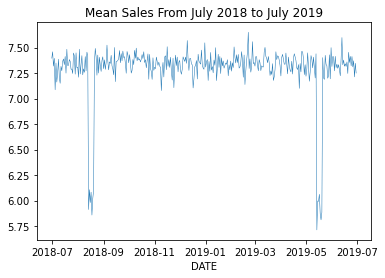

In [103]:
mean_sales_no_ol_ts.plot(linewidth=0.5)
plt.title('Mean Sales From July 2018 to July 2019')

(array([736876., 736883., 736890., 736897., 736907., 736914., 736921.,
        736928., 736938.]),
 <a list of 9 Text major ticklabel objects>)

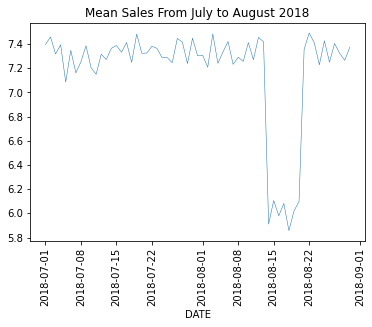

In [104]:
# Isolating these periods for a closer look.
jul_aug_18 = mean_sales_no_ol_ts[0:61]

jul_aug_18.plot(linewidth=0.5)
plt.title('Mean Sales From July to August 2018')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Mean Sales From May June 2019')

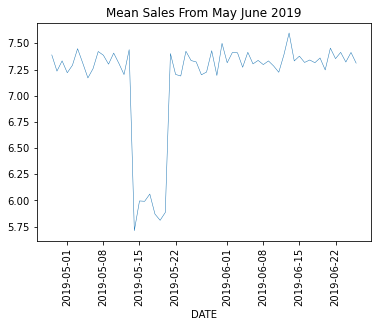

In [105]:
may_jun_19 = mean_sales_no_ol_ts[300:360]

may_jun_19.plot(linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Mean Sales From May June 2019')

In [106]:
total_sales_no_ol_ts = sales_no_ol.groupby(sales_no_ol.DATE.dt.date).TOT_SALES.sum()

mean_sales_no_ol_ts.head()

DATE
2018-07-01    7.396274
2018-07-02    7.459366
2018-07-03    7.318275
2018-07-04    7.394551
2018-07-05    7.086275
Name: TOT_SALES, dtype: float64

Text(0.5, 1.0, 'Total Sales From July 2018 to July 2019')

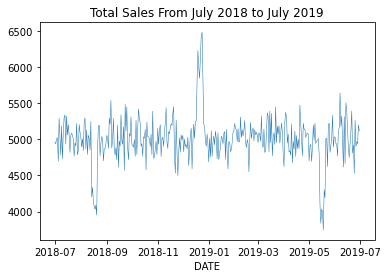

In [107]:
total_sales_no_ol_ts.plot(linewidth=0.5)
plt.title('Total Sales From July 2018 to July 2019')

Text(0.5, 1.0, 'Total Sales From July to August 2018')

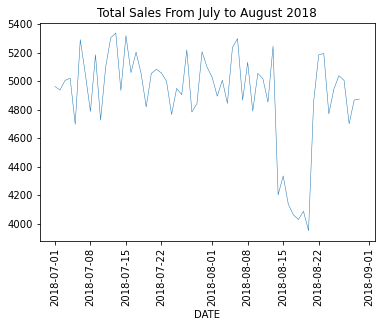

In [108]:
jul_aug_18_tot = total_sales_no_ol_ts[0:61]

jul_aug_18_tot.plot(linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Total Sales From July to August 2018')

Text(0.5, 1.0, 'Total Sales From May June 2019')

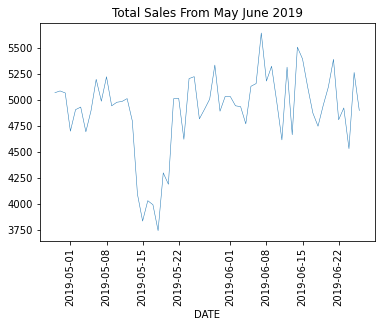

In [109]:
may_jun_19_tot = total_sales_no_ol_ts[300:360]

may_jun_19_tot.plot(linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Total Sales From May June 2019')

Text(0.5, 1.0, 'Total Sales From December 2018 to January 2019')

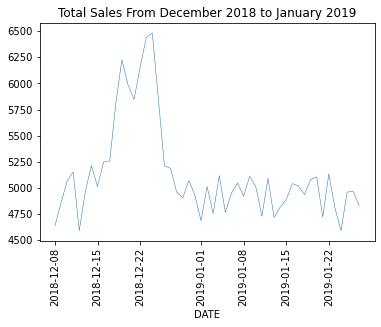

In [110]:
dec_jan_18_19_tot = total_sales_no_ol_ts[160:210]

dec_jan_18_19_tot.plot(linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Total Sales From December 2018 to January 2019')